# Comparing jktebop and ellc to PHOEBE

In this example script, we'll reproduce Figure 6 from the fitting release paper ([Conroy et al. 2020](http://phoebe-project.org/publications/2020Conroy+)).

<img src="http://phoebe-project.org/images/figures/2020Conroy+_fig6.png" alt="Figure 6" width="800px"/>

Let's first make sure we have the latest version of PHOEBE 2.4 installed (uncomment this line if running in an online notebook session such as colab).

In [ ]:
#!pip install -I "phoebe>=2.4,<2.5"

Next we'll import matplotlib and set some figure options before importing phoebe

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='serif', size=14, serif='STIXGeneral')
plt.rc('mathtext', fontset='stix')

In [2]:
import phoebe

In [3]:
def run_comparison_models(b):
    b.add_compute('legacy')
    b.add_compute('ellc', rv_method='flux-weighted')
    # for jktebop, we'll use requiv_max_limit=1.0 to allow the semi-detached case to run
    b.add_compute('jktebop', requiv_max_limit=1.0)
    
    b.add_dataset('lc', compute_phases=phoebe.linspace(0,1,1001))
    b.add_dataset('rv', compute_phases=phoebe.linspace(0,1,1001))
    
    if True:
        b.set_value_all('irrad_method', 'none')  # if not using this, then we need to use dynamical RVs for ellc
    else:
        b.set_value_all('rv_method', kind='ellc', value='dynamical')
          
    b.set_value_all('pblum_method', 'phoebe')
    
    b.set_value_all('ld_mode', 'lookup')
    b.set_value_all('ld_func', 'linear')
    
    b.run_compute(kind='phoebe', model='phoebe2_model', ntriangles=3000)
    b.run_compute(kind='legacy', model='phoebe1_model', gridsize=60)
    b.run_compute(kind='ellc', model='ellc_model')
    b.run_compute(kind='jktebop', model='jktebop_model')
    return b

# Detached Case

In [4]:
b = phoebe.default_binary()
b['period@binary'] = 1.2  # 1.0 case causes some issues with ellc
b['requiv@primary'] = 0.95  # same stars causes issues with RM in legacy

In [5]:
b = run_comparison_models(b)

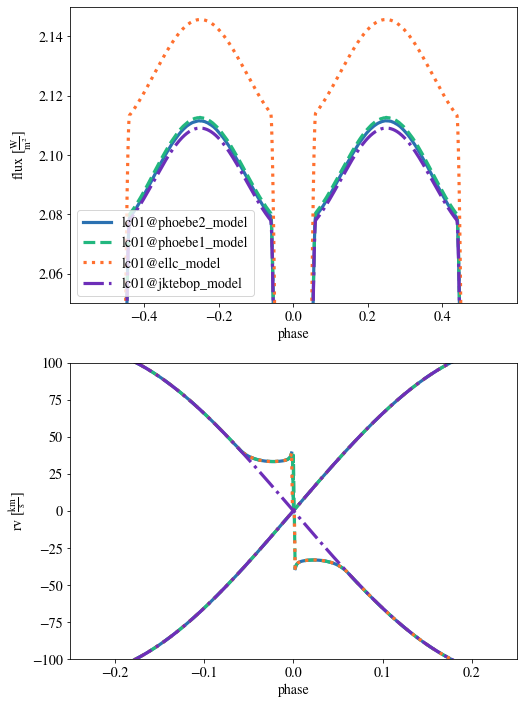

In [6]:
afig, mplfig = b.plot(x='phases', context='model',
                      ylim={'lc': (2.05,2.15), 'rv': (-100,100)}, xlim={'rv': (-0.25,0.25)},
                      c={'phoebe2_model': 'blue', 'phoebe1_model': 'green', 'ellc_model': 'orange', 'jktebop_model': 'purple'},
                      ls={'phoebe2_model': 'solid', 'phoebe1_model': 'dashed', 'ellc_model': 'dotted', 'jktebop_model': '-.'},
                      legend={'lc': True},
                      show=True, save='figure_backends_compare.pdf')

# Semi-Detached Case

In [7]:
b = phoebe.default_binary(semidetached='secondary')

b.set_value('period@binary', 3.0633292)
b.set_value('q@binary@component',0.24700)
b.set_value('ecc@binary@orbit', 0.0 )
b.set_value('requiv@primary@component', 2.8)
b.set_value('incl@orbit', 83.500)
b.set_value('sma@orbit', 15.9)

b.set_value('teff@primary', 12900.000000)
b.set_value('teff@secondary', 5500.000000)
b.set_value('gravb_bol@primary',1.0)
b.set_value('gravb_bol@secondary',0.32)
b.set_value('irrad_frac_refl_bol@primary',1.0)
b.set_value('irrad_frac_refl_bol@secondary',0.75)
b.set_value('per0@binary@orbit',0.0)

In [8]:
b = run_comparison_models(b)

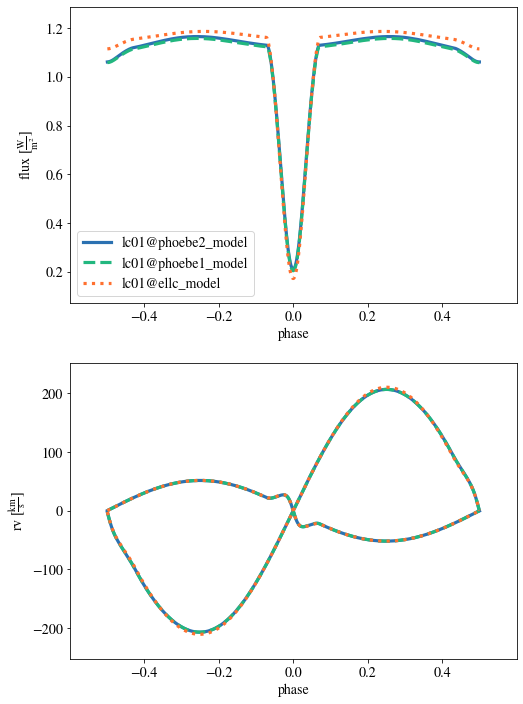

In [9]:
afig, mplfig = b.plot(x='phase', context='model',
                      compute=['phoebe01', 'legacy01', 'ellc01'],
                      c={'phoebe2_model': 'blue', 'phoebe1_model': 'green', 'ellc_model': 'orange', 'jktebop_model': 'purple'},
                      ls={'phoebe2_model': 'solid', 'phoebe1_model': 'dashed', 'ellc_model': 'dotted', 'jktebop_model': '-.'},
                      legend={'lc': True},
                      show=True, save='figure_backends_compare_semidetached.pdf')